# EDA Layer - TCS Stock Prediction

This notebook performs exploratory data analysis (EDA) on processed features (e.g., tcs_1y_features.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use('seaborn-v0_8-darkgrid')
sns.set()

## Load Data

In [2]:
df = pd.read_csv('data/processed/tcs_1y_features.csv')
df.index = pd.date_range(start='2022-01-01', periods=len(df), freq='B')  # Simulated datetime index
df.index.name = 'Date'
df.head()

,Open,High,Low,Close,Volume,Date,Price,MA20,MA50,RSI,...,Lag_4,Lag_5,Lag_6,Lag_7,Return_1d,Return_5d,Volatility_5d,Price_Change,Volume_Change,Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3881.502085,3937.838770,3855.434386,3923.134033,2688905.0,2024-03-07,3896.636578,3899.654150,3752.857285,48.460229,...,3909.527588,3910.243652,3933.017090,3919.123535,0.010900,0.003297,35.606252,41.631948,0.541623,3936.263428
2022-01-04,3904.418784,3965.529765,3904.418784,3936.263428,2304068.0,2024-03-11,3934.974275,3899.112244,3759.599727,51.474723,...,3896.493408,3909.527588,3910.243652,3933.017090,0.003347,0.006839,41.181629,31.844644,-0.143120,4003.007812
2022-01-05,3936.263259,4039.006185,3935.021662,4003.007812,4039801.0,2024-03-12,3987.013924,3902.528235,3767.380264,62.913523,...,3830.990479,3896.493408,3909.527588,3910.243652,0.016956,0.027336,64.203716,66.744554,0.753334,3961.710205
2022-01-06,4015.182312,4049.557238,3945.382022,3961.710205,2837260.0,2024-03-13,3997.469630,3902.504370,3774.549146,62.503994,...,3880.833984,3830.990479,3896.493408,3909.527588,-0.010317,0.034122,45.374713,-53.472107,-0.297673,4017.665527
2022-01-07,3965.959997,4034.279984,3901.554559,4017.665527,2919608.0,2024-03-14,3967.917271,3907.636731,3782.960405,60.163683,...,3923.134033,3880.833984,3830.990479,3896.493408,0.014124,0.035258,41.083159,51.705531,0.029024,4028.789307


## Correlation Matrix

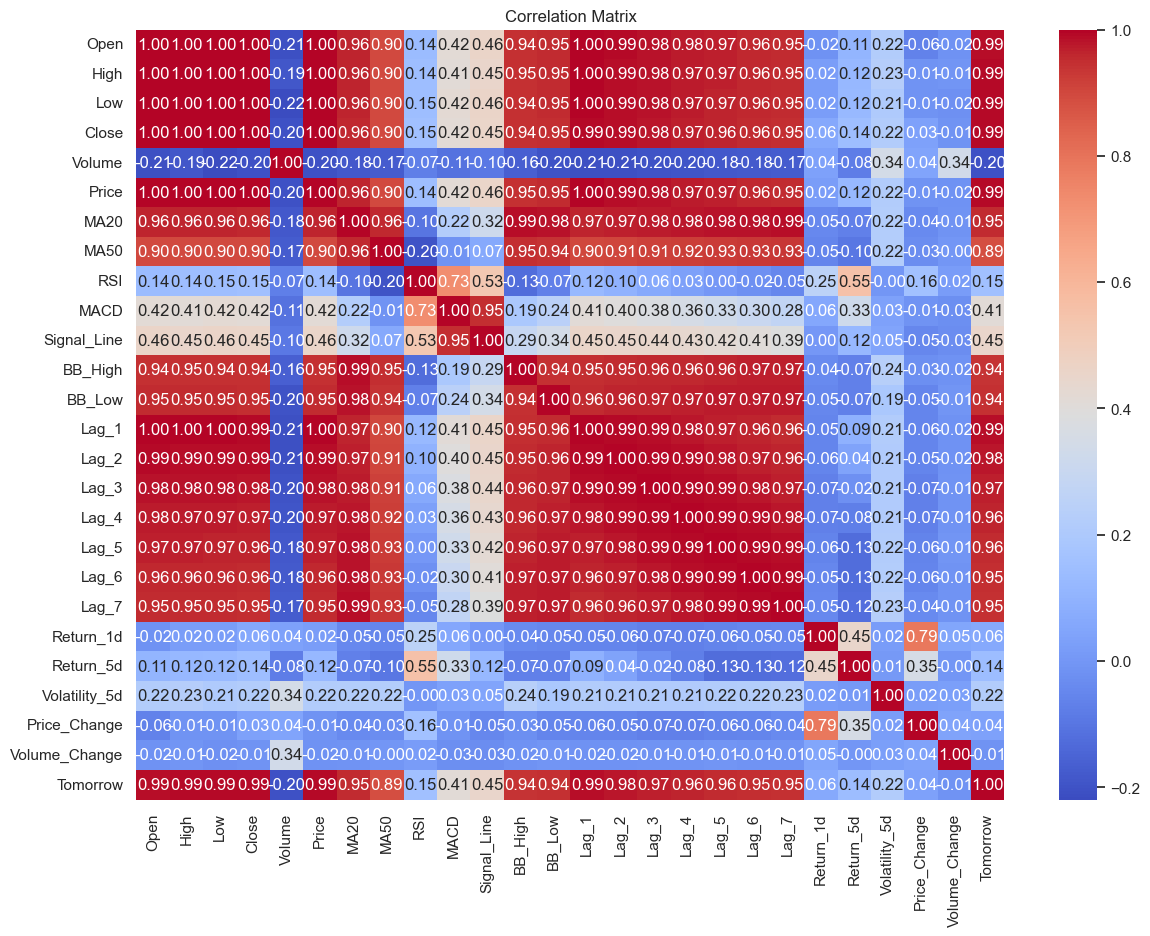

In [3]:
corr_df = df.drop(columns=['Date'])

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## MA20 & MA50

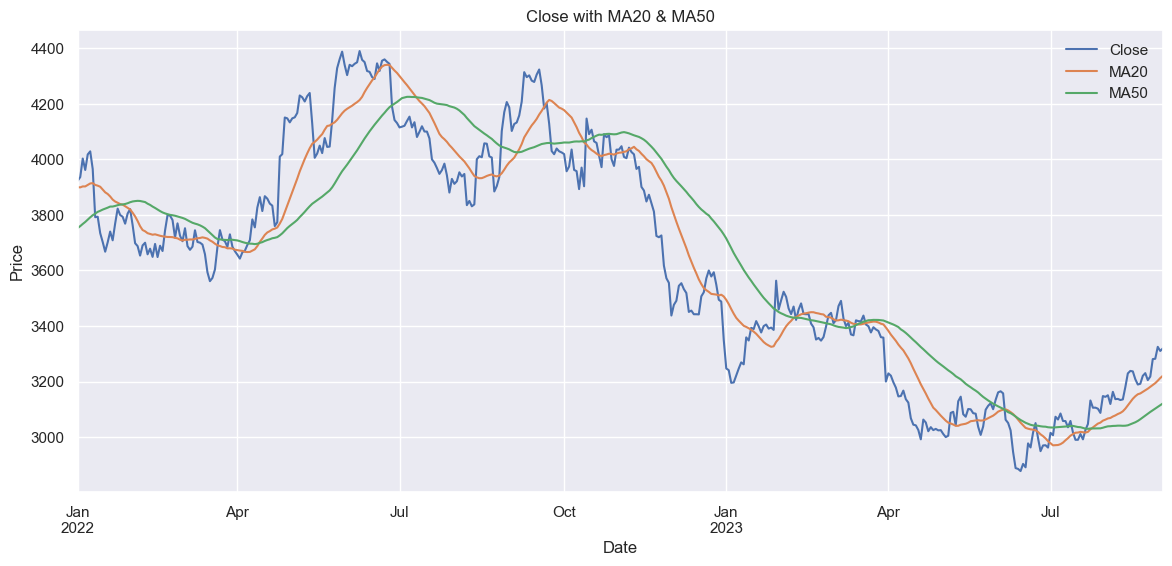

In [4]:
df[['Close', 'MA20', 'MA50']].plot(figsize=(14, 6), title='Close with MA20 & MA50')
plt.ylabel("Price")
plt.show()

## RSI and MACD

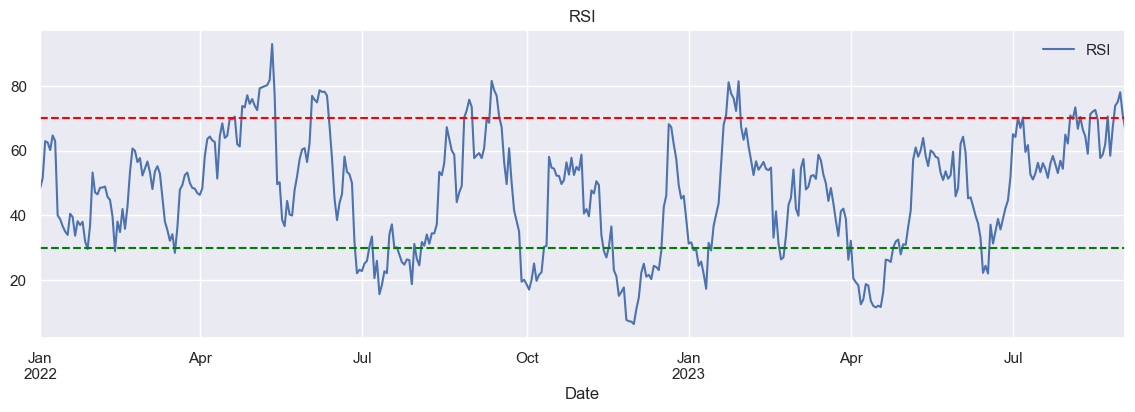

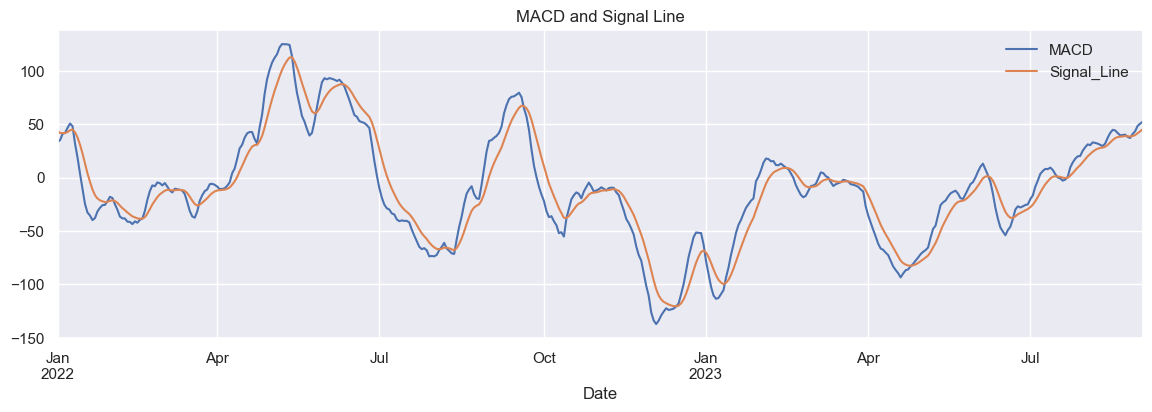

In [5]:
df[['RSI']].plot(figsize=(14, 4), title='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

df[['MACD', 'Signal_Line']].plot(figsize=(14, 4), title='MACD and Signal Line')
plt.show()

## Bollinger Bands

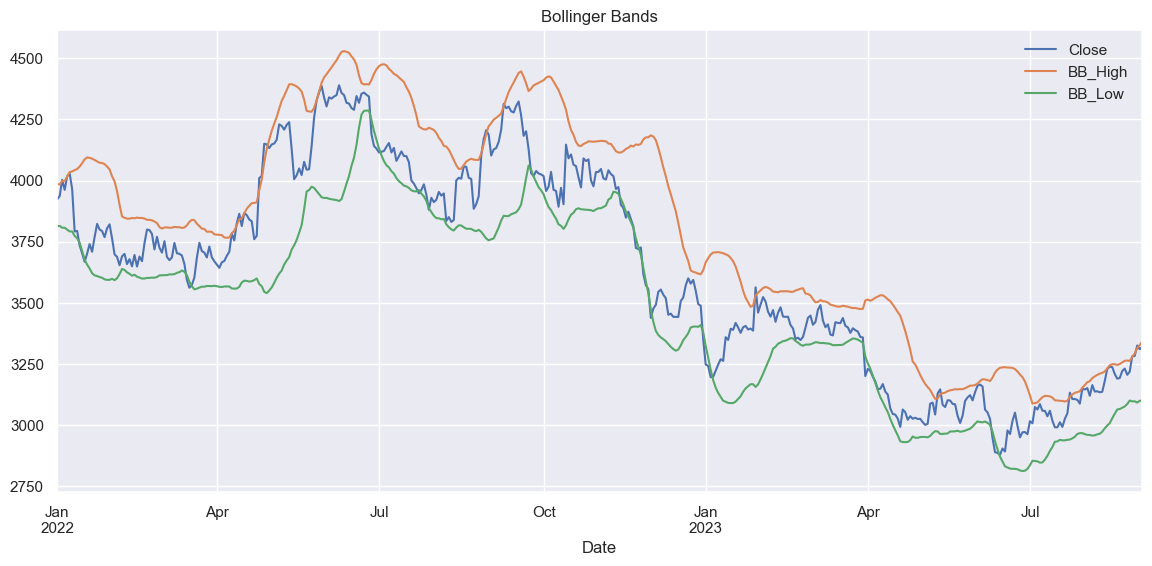

In [6]:
df[['Close', 'BB_High', 'BB_Low']].plot(figsize=(14, 6), title='Bollinger Bands')
plt.show()

## Rolling Volatility

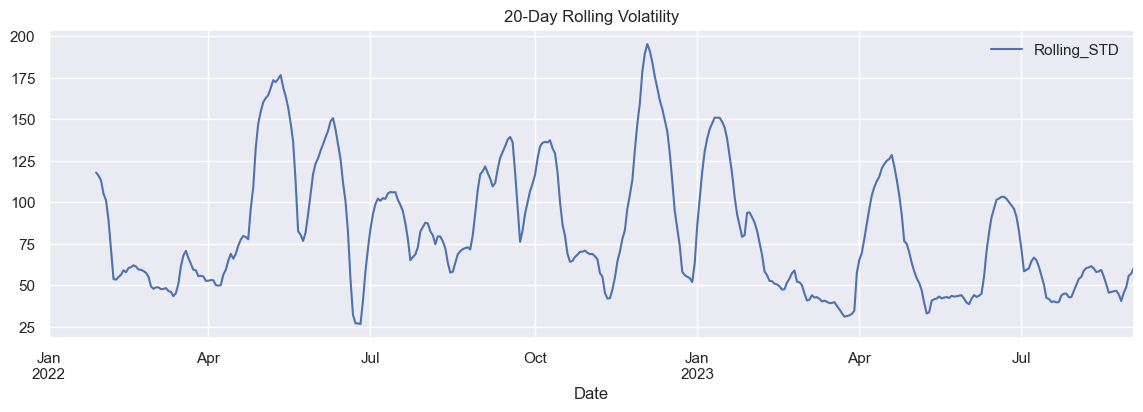

In [7]:
df['Rolling_STD'] = df['Close'].rolling(window=20).std()
df[['Rolling_STD']].plot(figsize=(14, 4), title='20-Day Rolling Volatility')
plt.show()

## Monthly Seasonality

/var/folders/nk/m2ky5_p959dft184vsc38gfr0000gn/T/ipykernel_12770/1023449337.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


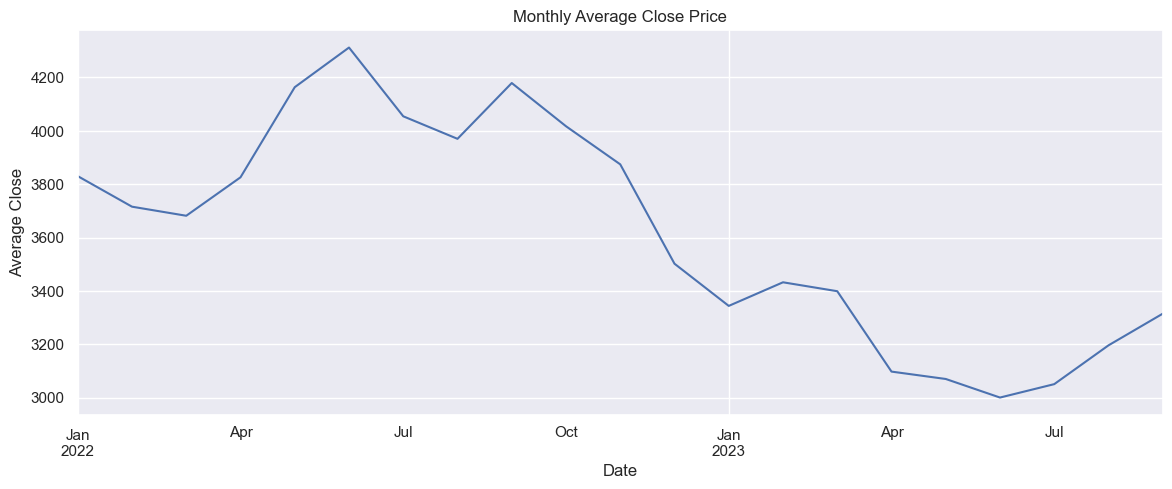

In [8]:
monthly_avg = df['Close'].resample('M').mean()
monthly_avg.plot(figsize=(14, 5), title='Monthly Average Close Price')
plt.ylabel("Average Close")
plt.show()

## ACF and PACF

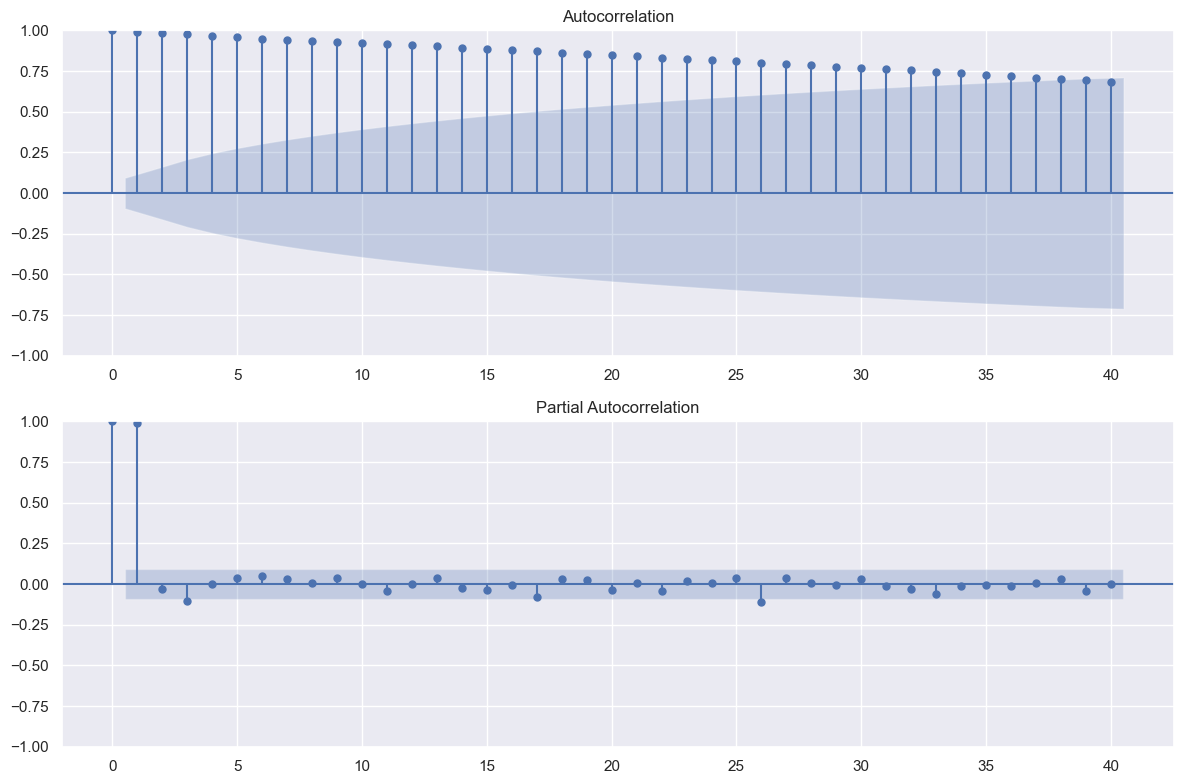

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(df['Close'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Close'], lags=40, ax=ax[1])
plt.tight_layout()
plt.show()

## Volume Trend & Rolling Mean

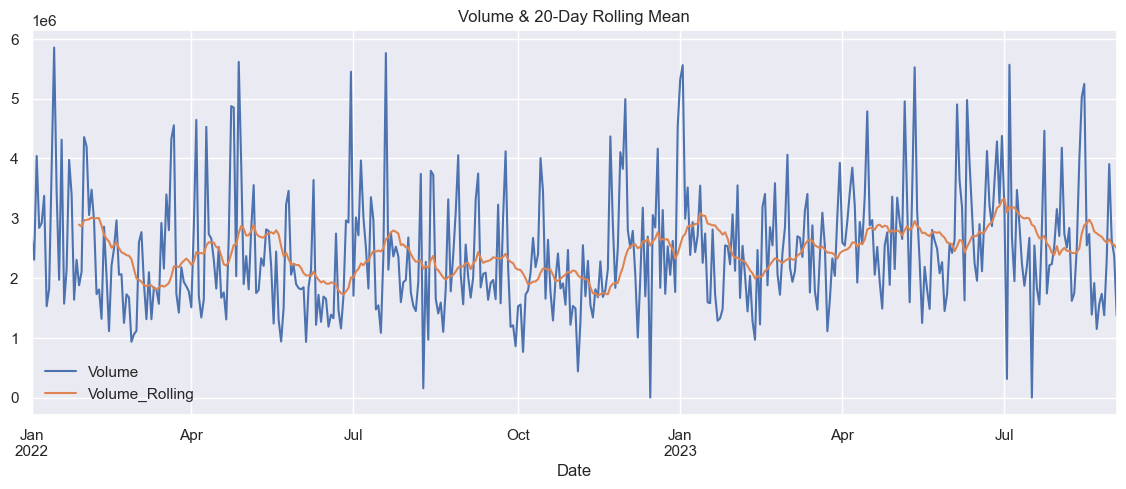

In [10]:
df['Volume_Rolling'] = df['Volume'].rolling(window=20).mean()
df[['Volume', 'Volume_Rolling']].plot(figsize=(14, 5), title='Volume & 20-Day Rolling Mean')
plt.show()

## Daily Return Analysis

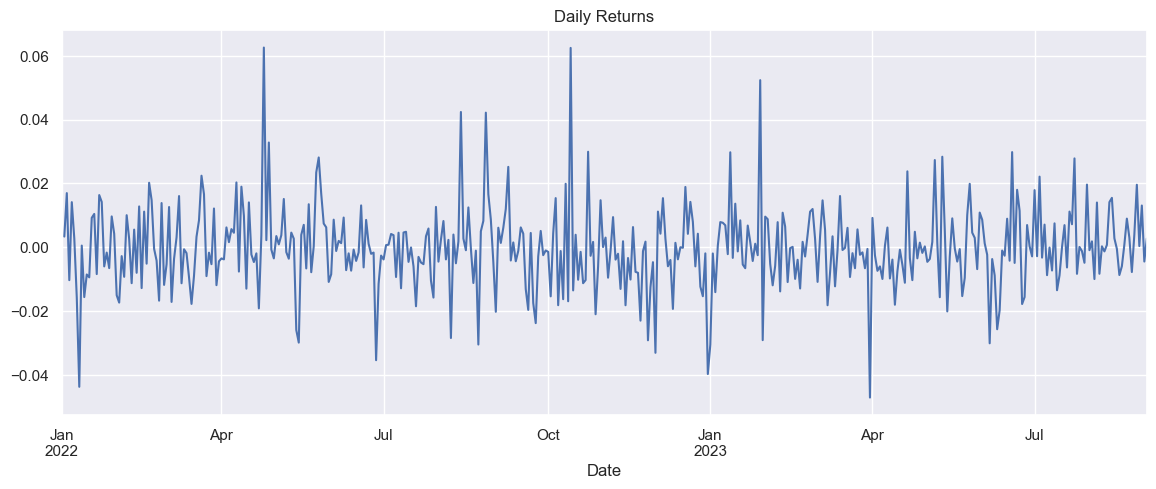

In [11]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(14, 5), title='Daily Returns')
plt.show()

## Return Distribution

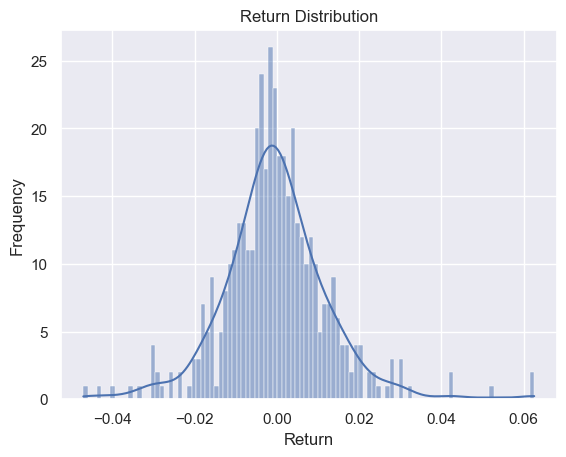

In [12]:
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

## Close vs Volume Scatter

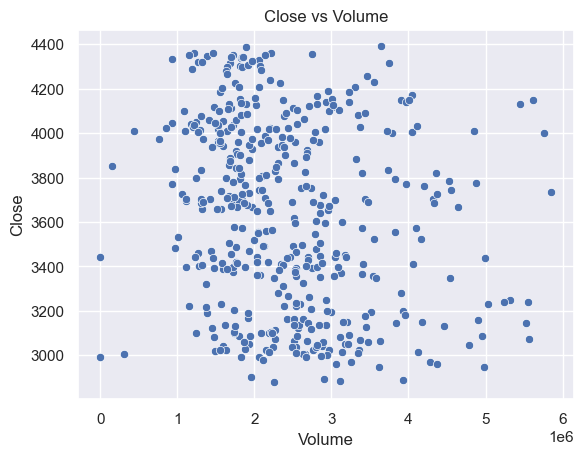

In [13]:
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title('Close vs Volume')
plt.show()

## Cumulative Returns

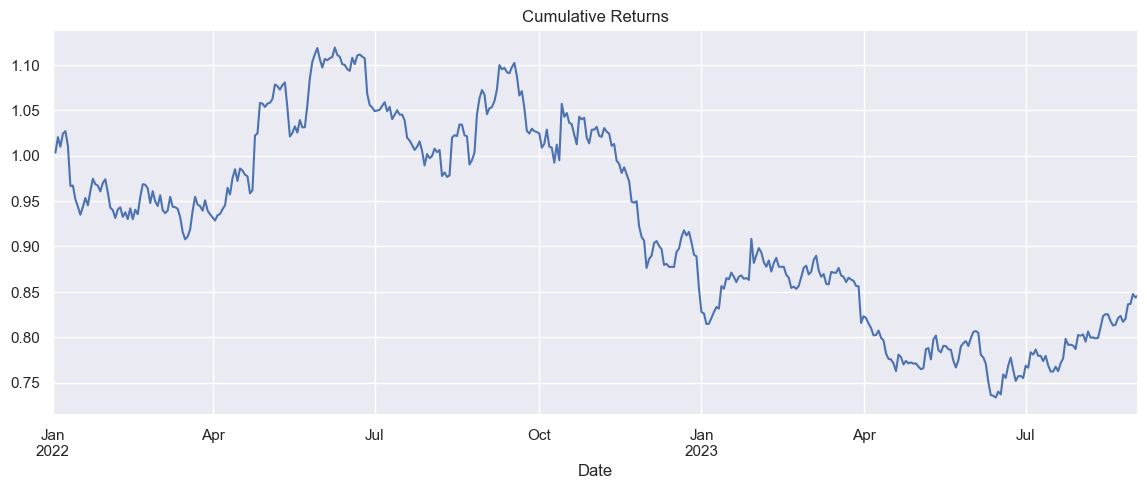

In [14]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
df['Cumulative_Return'].plot(figsize=(14, 5), title='Cumulative Returns')
plt.show()

## RSI Zones Count

In [15]:
overbought = (df['RSI'] > 70).sum()
oversold = (df['RSI'] < 30).sum()
print(f"Overbought days: {overbought}, Oversold days: {oversold}")

Overbought days: 49, Oversold days: 85


## MACD Crossover Signal Count

In [16]:
df['MACD_Cross'] = df['MACD'] > df['Signal_Line']
crossovers = df['MACD_Cross'].astype(int).diff().fillna(0).abs().sum()
print(f"MACD crossover signals: {int(crossovers)}")

MACD crossover signals: 33
